# Set up

In [1]:
!nvidia-smi

Thu Jun 29 21:29:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Importing helper_functions.py

In [2]:
!wget https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py

--2023-06-29 21:29:32--  https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11818 (12K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  11.54K  --.-KB/s    in 0s      

2023-06-29 21:29:32 (91.5 MB/s) - ‘helper_functions.py’ saved [11818/11818]



In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

# Import data

We're going to use tf.keras.applications to use pretrained models. Here we'll find all pretrained models used in previous lessons https://www.tensorflow.org/api_docs/python/tf/keras/applications

Get 10% of training data of 10 classes of Food101 mrdbourke/tensorflow-deep-learning repo

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-29 21:29:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   158MB/s    in 1.0s    

2023-06-29 21:29:37 (158 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



## unzip the data

In [5]:
unzip_data('10_food_classes_10_percent.zip')

## walk through dir

let's checkout what is included within imported folder

In [6]:
walk_through_dir('10_food_classes_10_percent/')

There are 2 directories and 0 images in '10_food_classes_10_percent/'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/te

Let's remember that we're using 10% of the data what implies only to the training set (originaly 750, here 75 per class). Test set remains untouched, so 250 images per class.

## Create train and test dirs

In [7]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

## Data Generator

Previously we've used ImageDataGenerator to generate all the data now we're going to use ImageDatasetFromDirectory which creates tf.data.Dataset tensorflow datatype which is faster. https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [8]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            batch_size = BATCH_SIZE,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical', # for multiclass classification
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


image_dataset_from_directory put all data into batched dataset type

In [9]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

From above data we can tell that:

* shape = (None, 224, 224, 3) - data are in batches, 32 in single batch (there is None but it's 32. Size of image is 224 x 224 and each image is in RGB mode.
* shape = (None, 10) - there are 10 classes

In [10]:
class_names = train_data_10_percent.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
import matplotlib.pyplot as plt

# Takes one batch and goes through images and labels
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[6.06989784e+01 3.86989784e+01 1.46989803e+01]
   [6.32602043e+01 4.12602043e+01 1.72602043e+01]
   [6.07857132e+01 3.87857132e+01 1.47857141e+01]
   ...
   [8.87193375e+01 6.32908096e+01 3.35050735e+01]
   [8.61121979e+01 6.01122017e+01 3.31122017e+01]
   [7.57855377e+01 4.97855415e+01 2.27855415e+01]]

  [[6.23571396e+01 4.03571396e+01 1.63571434e+01]
   [6.31428528e+01 4.11428528e+01 1.71428566e+01]
   [5.80714264e+01 3.60714264e+01 1.20714283e+01]
   ...
   [9.64999390e+01 7.10714111e+01 4.10714073e+01]
   [1.00147957e+02 7.51479568e+01 4.50816193e+01]
   [9.60203018e+01 7.10203018e+01 4.06886330e+01]]

  [[6.11530609e+01 3.91530609e+01 1.61530609e+01]
   [6.07704086e+01 3.87704086e+01 1.57704077e+01]
   [6.25510216e+01 4.05510216e+01 1.75510216e+01]
   ...
   [9.77398224e+01 7.24796677e+01 4.11888161e+01]
   [9.47142639e+01 7.07142639e+01 3.67142601e+01]
   [9.20612411e+01 6.80612411e+01 3.36326714e+01]]

  ...

  [[6.97091446e+01 2.11376762e+01 4.35193968e+00]
   [6

# Models - Functional API

Previously we've used Sequential API, now we're going to use Sequential API

## Model 0 - Feature Extraction with 10% of training data

 Building a transfer learning FEATURE EXTRACTION (so not fine tunning just yet) model using Keras Functional API

#### Model

In [12]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model (so the underlying pre-trained weights aren't updated while training)
base_model.trainable = False

# 3. Create inputs to our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = 'input_layer')

# 4. If you're using ResNet50V2 you need to normalize inputs (we don't have to while using EfficientNets)
# x = tf.keras.layers.experimental.preprocessing.Rescalling(1./255)(inputs)

# 5. Pass the inputs to the base model
x = base_model(inputs)
print(f'Shape after passing inputs through base model: {x.shape}')

# 6. Average pool the outputs of the base model (aggretates all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)
print(f'Shape after GlobalAveragePooling2D: {x.shape}')

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile for the model
model_0.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# 10. Fit the model and save it's history
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs = 5,
                                 steps_per_epoch = len(train_data_10_percent),
                                 validation_data = test_data,
                                 validation_steps = int(0.25 * len(test_data)),
                                 callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                          experiment_name = '10_percent_feature_extraction')]
                                 )

16705208/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230629-212950


Epoch 1/5
24/24 [==============================] - 31s 352ms/step - loss: 1.8222 - accuracy: 0.4680 - val_loss: 1.2718 - val_accuracy: 0.7319
Epoch 2/5
24/24 [==============================] - 4s 138ms/step - loss: 1.0699 - accuracy: 0.7720 - val_loss: 0.8637 - val_accuracy: 0.8125
Epoch 3/5
24/24 [==============================] - 5s 186ms/step - loss: 0.7727 - accuracy: 0.8360 - val_loss: 0.6994 - val_accuracy: 0.8438
Epoch 4/5
24/24 [==============================] - 4s 144ms/step - loss: 0.6303 - accuracy: 0.8560 - val_loss: 0.6161 - val_accuracy: 0.8470
Epoch 5/5
24/24 [==============================] - 4s 143ms/step - loss: 0.5304 - accuracy: 0.8907 - val_loss: 0.5686 - val_accuracy: 0.8536


#### Evaluate

In [13]:
# Evaluate on a full dataset
model_0.evaluate(test_data)

79/79 [==============================] - 8s 90ms/step - loss: 0.5582 - accuracy: 0.8656


[0.5582485198974609, 0.8655999898910522]

#### Summary

In [14]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [15]:
# Summary of base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [16]:
# Summary of our model_0
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


#### Curves

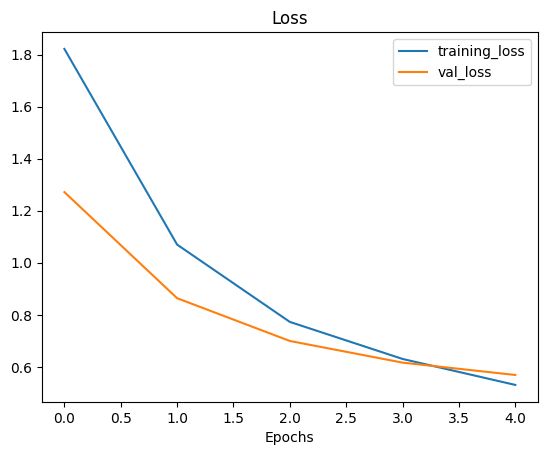

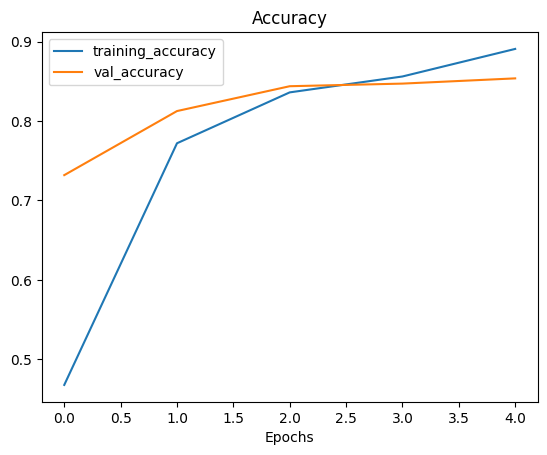

In [17]:
plot_loss_curves(history_10_percent)

#### Feature Vector from trained model

Let's demonstrate the Global Average Pooling 2D layer

We have a tensor after out model goes through 'base_model' of shape (None, 7, 7, 1280).

But the when it passes through GlobalAveragePooling2D, it turns into (None, 1280).

Lets' use a similar shaped tensor of (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D.

In [18]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f'Random input tensor:\n {input_tensor}\n')

# PAss the random tensor through a global average pooling 2D layer

gap_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'2D global average pooled random tensor:\n {gap_tensor}\n')

# Check the shape of the different tensors
print(f'Shape of input tensor: {input_tensor.shape}')
print(f'Shape of global average pooled 2D tensor: {gap_tensor.shape}')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of global average pooled 2D tensor: (1, 3)


Let's replicate the GlobalAveragePool2D layer

In [19]:
tf.reduce_mean(input_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

Let's now repeat the exercise for GlobalMaxPooling2D

In [20]:
print(f'Random input tensor:\n {input_tensor}\n')

# PAss the random tensor through a global max pooling 2D layer

gmp_tensor = tf.keras.layers.GlobalMaxPooling2D()(input_tensor)
print(f'2D global max pooled random tensor:\n {gmp_tensor}\n')

# Check the shape of the different tensors
print(f'Shape of input tensor: {input_tensor.shape}')
print(f'Shape of global max pooled 2D tensor: {gmp_tensor.shape}')

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global max pooled random tensor:
 [[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of global max pooled 2D tensor: (1, 3)


Let's replicate the GlobalMaxPool2D layer

In [21]:
tf.reduce_max(input_tensor, axis = [1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

So reduce_average and reduce_max computes the mean or maximum of elements across dimensions of a tensor. That means from a 3 dimension tensor we receive 1 dimension vector. We can see now how GlobalAveragePooling2D and GlobalMaxPooling2D layers works. It's all about feature extraction, so taking out average or maximum value from certain dimension that allows us to reduce the data and take out only values that are most efficient in given meaning (average or maximum)

**Feature Vector** - Is a learned representation of the input data (a compressed form of the input data based on how the model see's it)

## Model 1: Feature Extraction 1% of training data + data augmentation

### Set up

In [22]:
!wget https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py

--2023-06-29 21:30:51--  https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11818 (12K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  11.54K  --.-KB/s    in 0s      

2023-06-29 21:30:51 (103 MB/s) - ‘helper_functions.py.1’ saved [11818/11818]



In [23]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [24]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data('10_food_classes_1_percent.zip')

--2023-06-29 21:30:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   115MB/s    in 1.1s    

2023-06-29 21:30:53 (115 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [25]:
# Create train and test dirs
train_dir = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [26]:
# Check data
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'

In [27]:
# Setup data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           batch_size = BATCH_SIZE,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = 'categorical')

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                          batch_size = BATCH_SIZE,
                                                                          image_size = IMG_SIZE,
                                                                          label_mode = 'categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data Augmentation Layer

Benefits of using data augmentation inside the model are:

* Preprocessing (images augmentation) happens on GPU rather thatn on CPU what makes computation faster
* Image data augmentation happens only during training, so we can still export our whole model and use it elsewhere.

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontal flip, zoom, rotation...
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # perprocessing.Rescale(1./255) # Keep for models like ResNet50V2 but EfficientNet has built it rescalling
], name = 'data_augmentation')

### Visualize data augmentation layer

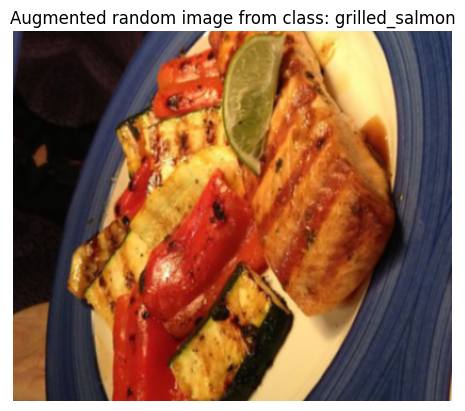

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = '10_food_classes_1_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read in the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0))
plt.figure()
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)
plt.imshow(tf.squeeze(augmented_img)/255.)

In [30]:
target_class

'grilled_salmon'

### Model

In [31]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape = input_shape, name = 'input_layer')

# Add in data augmentetion Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training = False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# Make a model using inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_1_percent),
                                validation_data = test_data,
                                validation_steps = int(0.25 * len(test_data)),
                                callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                         experiment_name = '1_percent_data_augmented')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20230629-213059
Epoch 1/5
3/3 [==============================] - 13s 3s/step - loss: 2.4545 - accuracy: 0.1000 - val_loss: 2.2666 - val_accuracy: 0.1365
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1603 - accuracy: 0.3429 - val_loss: 2.1299 - val_accuracy: 0.2484
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9635 - accuracy: 0.3714 - val_loss: 1.9962 - val_accuracy: 0.3487
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.7503 - accuracy: 0.6286 - val_loss: 1.9076 - val_accuracy: 0.4062
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.6293 - accuracy: 0.5857 - val_loss: 1.7867 - val_accuracy: 0.4737


### Evaluate

In [32]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 67ms/step - loss: 1.8019 - accuracy: 0.4756


[1.8019171953201294, 0.475600004196167]

### Summary

In [33]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Curves

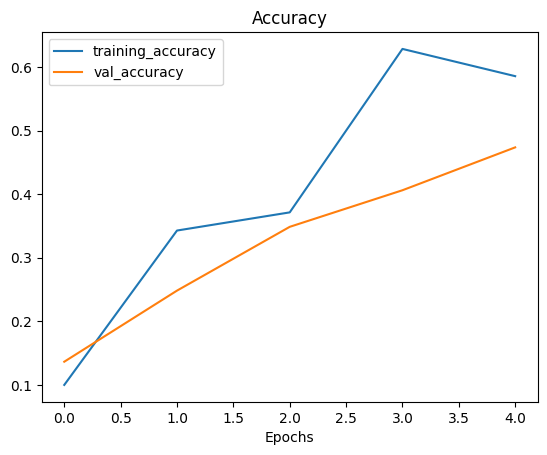

In [34]:
plot_loss_curves(history_1_percent)

## Model 2: Feature Extraction with 10% of training data + data augmentation

#### Set up

In [35]:
!wget https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py

--2023-06-29 21:31:44--  https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11818 (12K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  11.54K  --.-KB/s    in 0s      

2023-06-29 21:31:44 (107 MB/s) - ‘helper_functions.py.2’ saved [11818/11818]



In [36]:
from helper_functions import plot_loss_curves, unzip_data, create_tensorboard_callback, walk_through_dir

In [37]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-29 21:31:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.128, 142.251.16.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  99.7MB/s    in 1.6s    

2023-06-29 21:31:46 (99.7 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [38]:
unzip_data('10_food_classes_10_percent.zip')

In [39]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [40]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [41]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                            batch_size = BATCH_SIZE,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical')


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           batch_size = BATCH_SIZE,
                                                                           image_size = IMG_SIZE,
                                                                           label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data Augmentation Layer

In [42]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
], name = 'data_augmentation')

### Visualize data augmentation

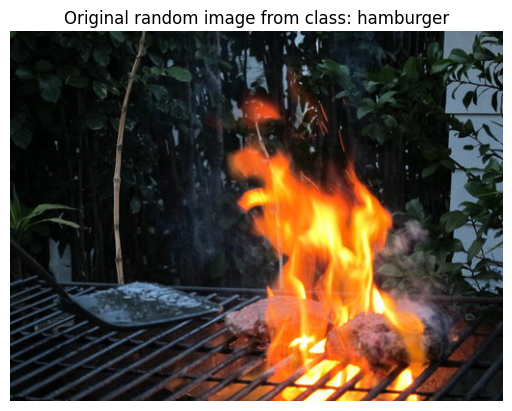

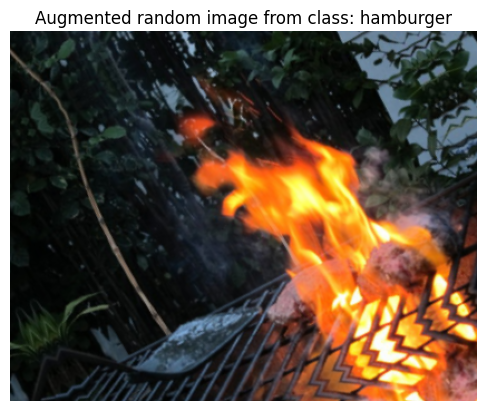

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = '10_food_classes_10_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read in the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0))
plt.figure()
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)
plt.imshow(tf.squeeze(augmented_img)/255.)

### Model

In [44]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_layer')

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#### ModelCheckpoint callback

Model checkpoint callback save your model (or just the weights) as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.

In [45]:
# ModelCheckpoint callback

# Set checkpoint path
checkpoint_path = 'ten_percent_model_checkpoint_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, # path where model will be saved
                                                         save_weights_only = True, # only weights of the model will be saved instead whole model
                                                         save_best_only = False, # if true only best epoch will be save, and we won't be able to follow how model was trained through all the epochs
                                                         save_freq = 'epoch', # how often checkpoint should be made, here every epoch
                                                         verbose = 1)

In [46]:
history_model_2 = model_2.fit(train_data_10_percent,
            epochs = 5,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                     experiment_name = '10_percent_data_augmented'),
                         checkpoint_callback]
            )

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented/20230629-213155
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9571 - accuracy: 0.3680
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 27s 816ms/step - loss: 1.9571 - accuracy: 0.3680 - val_loss: 1.4209 - val_accuracy: 0.6860
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2948 - accuracy: 0.7000
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 18s 722ms/step - loss: 1.2948 - accuracy: 0.7000 - val_loss: 0.9680 - val_accuracy: 0.8124
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9703 - accuracy: 0.7800
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 17s 701ms/step - loss: 0.9703 - accuracy: 0.7800 - val_loss: 0.7766 - val_accuracy: 0.828

### Evaluate

In [47]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 7s 81ms/step - loss: 0.6094 - accuracy: 0.8528


[0.6093643307685852, 0.8528000116348267]

### Summary

In [48]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Curves

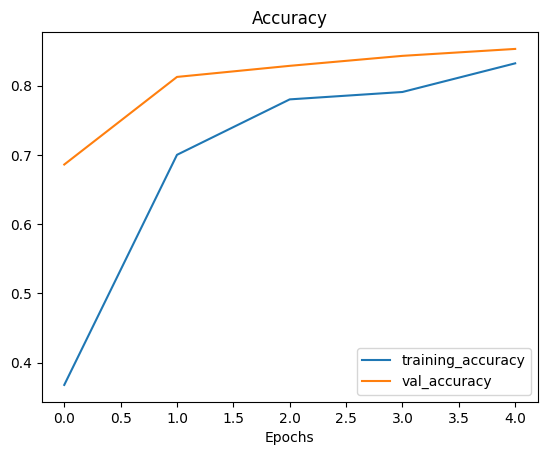

In [49]:
plot_loss_curves(history_model_2)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.

In [50]:
checkpoint_path

'ten_percent_model_checkpoint_weights/checkpoint.ckpt'

In [51]:
# Load in saved model weights and evaluate model

model_2.load_weights(checkpoint_path)

In [52]:
# Evalutae model_2 with loaded weights

loaded_weights_model_results = model_2.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 6s 75ms/step - loss: 0.6094 - accuracy: 0.8528


[0.6093645691871643, 0.8528000116348267]

In [53]:
# Let's check if the evaluation of loaded weights model return the same evaluation as original model_2

results_10_percent_data_aug

[0.6093643307685852, 0.8528000116348267]

In [54]:
loaded_weights_model_results == results_10_percent_data_aug

False

Evaluations are not exactly the same due to different method of storage of numbers in the computer. However, we can check if the numbers are close to each other.

In [55]:
import numpy as np

np.isclose(np.array(loaded_weights_model_results),
           np.array(results_10_percent_data_aug))

array([ True,  True])

Let's now check the difference between two results

In [56]:
np.array(loaded_weights_model_results) - np.array(results_10_percent_data_aug)

array([2.38418579e-07, 0.00000000e+00])

As we can see the difference is in loss only and it's very small

## Model 3: Fine-Tuning with 10% of training data + data augmentation

In feature extraction all layers of the model were frozen but last dense layer, that had shape set accordingly to amount of our classes. Basically, this last layer was an only connector between our specific classes and transferred model. In fine tunning we're using a bit different approach. Here we unfreeze some given number of model's inner layers. That will allow to actually re-train the model on those layers, to fit this model to our classes. This is common tehnique when our classes are not that common, e.g. instead of classifing common objects, we might want to classify faces of 5 people. Then we would need to train model on each persons face, however we'd still be able to use already trained model. In this and other situations we can use transfer learning fine tunning. When we unfreeze the layers, we take layers near to the output not the input, due to the fact that the closer to the input we are the more general features model is learning, thus we want make model able to learn general features like curves, grain, shapes, etc before more specific to our classes features.

### Set up

In [57]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-29 21:33:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   198MB/s    in 0.8s    

2023-06-29 21:33:56 (198 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [58]:
!wget https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py

--2023-06-29 21:33:56--  https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11818 (12K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  11.54K  --.-KB/s    in 0s      

2023-06-29 21:33:56 (115 MB/s) - ‘helper_functions.py.3’ saved [11818/11818]



In [59]:
from helper_functions import plot_loss_curves, unzip_data, create_tensorboard_callback, walk_through_dir

In [60]:
unzip_data('10_food_classes_10_percent.zip')

In [61]:
walk_through_dir('10_food_classes_10_percent/')

There are 2 directories and 0 images in '10_food_classes_10_percent/'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/te

In [62]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [63]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = 'categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = BATCH_SIZE,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data Augmentation Layer

In [64]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
], name = 'data_augmentation')

### Visualize data augmentation

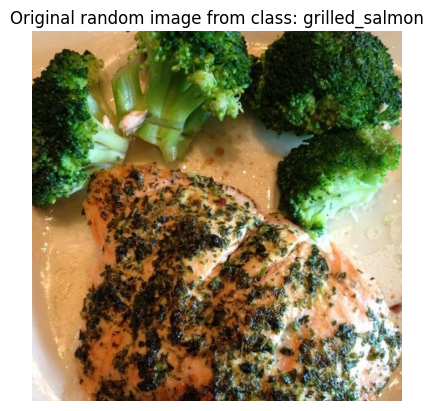

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = '10_food_classes_10_percent/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read in the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0))
plt.figure()
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)
plt.imshow(tf.squeeze(augmented_img)/255.)

### Feature Extraction Model

**IMPORTANT** Fine tunning works the best after a few epochs of training of feature extraction model training on large amounts of custom data.

So the process goes like that:

1. train model with feature extraction transfer learning
2. use ModelCheckpoint callback to save the weights of feature extraction model
3. upload weights from feature extraction model
4. train fully-connected dense layer on fine tuning transfer learning model

In [66]:
import tensorflow as tf

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# input
inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_layer')

# data augmentation
x = data_augmentation(inputs)

# base_model
x = base_model(x, training = False)

# global average pooling 2d
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_2D')(x)

# output
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# model
model_3 = tf.keras.Model(inputs, outputs)

# compile
model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# ModelCheckpoint callback
# Set checkpoint path
checkpoint_path = 'ten_percent_model_checkpoint_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, # path where model will be saved
                                                         save_weights_only = True, # only weights of the model will be saved instead whole model
                                                         save_best_only = False, # if true only best epoch will be save, and we won't be able to follow how model was trained through all the epochs
                                                         save_freq = 'epoch', # how often checkpoint should be made, here every epoch
                                                         verbose = 1)

# fit
history_model_3 = model_3.fit(train_data_10_percent,
                              epochs = 5,
                              steps_per_epoch = len(train_data_10_percent),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                       experiment_name = '10_percent_data_augmentation_fine_tunning'),
                                           checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmentation_fine_tunning/20230629-213402
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0787 - accuracy: 0.2813
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 22s 614ms/step - loss: 2.0787 - accuracy: 0.2813 - val_loss: 1.5194 - val_accuracy: 0.6468
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3629 - accuracy: 0.6893
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 15s 606ms/step - loss: 1.3629 - accuracy: 0.6893 - val_loss: 1.0280 - val_accuracy: 0.7700
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0277 - accuracy: 0.7667
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 14s 565ms/step - loss: 1.0277 - accuracy: 0.7667 - val_loss: 0.8085 - val

#### Loading checkpoints

In [67]:
model_3.load_weights(checkpoint_path)

#### Check Feature Extraction Model

In [68]:
# Are these layers trainable?
for layer in model_3.layers:
  print(layer.name, '\n',  layer, '\n',layer.trainable, '\n\n')

input_layer 
 True 


data_augmentation 
 True 


efficientnetb0 
 False 


global_average_pooling_2D 
 True 


output_layer 
 True 




Let's now see all layers from base_model

In [69]:
for i, layer in enumerate(model_3.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_4 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

So, above we can see that all layers in base_model are freezed.

How many trainable variables are in our base model?

In [70]:
print(len(model_3.layers[2].trainable_variables))

0


As we can see we have no trainable variables in our base_model just yet

### Fine Tuning Model

As we can see the only layer that is not trainable is functional layer which is whole base_model. We set that to be untrainable, now we need to unlock some of the layers from base_model for fine tuning.

#### Unfreezing 10 layers

We're going to unfreeze last 10 layes

In [71]:
from keras.api._v2.keras.callbacks import ModelCheckpoint
# Setting last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# We need to recompile our model after setting new hyperparameters
model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # Usually when we fine tuning we want to lower our learning rate by 10x
                metrics = ['accuracy'])

When using fine-tuning it's best practive to lower learning rate by some amount. How much? This is a hyperparameter you can tune. But a good rule of thumb is 10x (though different sources will clame other values). Resource: https://arxiv.org/abs/1801.06146

In [72]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_4 False
rescaling_6 False
normalization_3 False
rescaling_7 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

How many trainable variables are there now?

In [73]:
print(len(model_3.trainable_variables))

12


Great, now we have 12 trainable sets

#### Fine tune for 5 epochs more

Fine tune for another 5 epochs

In [74]:
# fine tune for another 5 epochs
fine_tune_epochs = 5 + 5 # initial_epochs + 5 more

# refit the model (same as model_3 except with more trainable layers)
history_fine_10_percent_data_aug = model_3.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               steps_per_epoch = len(train_data_10_percent),
                                               validation_data = test_data,
                                               validation_steps = int(0.25 * len(test_data)),
                                               initial_epoch = history_model_3.epoch[-1], # start training from last epoch from feature extraction model. Very IMPORTANT!!!
                                               callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                                      experiment_name = '10_percent_fine_rune_last_10_layers')])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_rune_last_10_layers/20230629-213534


Epoch 5/10
24/24 [==============================] - 24s 514ms/step - loss: 0.6312 - accuracy: 0.8213 - val_loss: 0.4399 - val_accuracy: 0.8684
Epoch 6/10
24/24 [==============================] - 8s 331ms/step - loss: 0.5036 - accuracy: 0.8507 - val_loss: 0.3948 - val_accuracy: 0.8783
Epoch 7/10
24/24 [==============================] - 13s 551ms/step - loss: 0.4371 - accuracy: 0.8747 - val_loss: 0.3728 - val_accuracy: 0.8799
Epoch 8/10
24/24 [==============================] - 10s 369ms/step - loss: 0.4016 - accuracy: 0.8747 - val_loss: 0.3625 - val_accuracy: 0.8734
Epoch 9/10
24/24 [==============================] - 10s 410ms/step - loss: 0.3692 - accuracy: 0.8813 - val_loss: 0.3629 - val_accuracy: 0.8832
Epoch 10/10
24/24 [==============================] - 9s 375ms/step - loss: 0.3511 - accuracy: 0.8987 - val_loss: 0.3381 - val_accuracy: 0.8849


#### Evaluate

In [75]:
results_fine_tune_10_percent = model_3.evaluate(test_data)
results_fine_tune_10_percent

79/79 [==============================] - 6s 68ms/step - loss: 0.4124 - accuracy: 0.8648


[0.41241827607154846, 0.864799976348877]

In [76]:
# Previous model evaluation

results_10_percent_data_aug

[0.6093643307685852, 0.8528000116348267]

As we can see we slightly improved our fine tuned model in comparison to just feature extraction model by ~1.2%. However, let's remember that both models are trained on just 10% percent of training data.

#### Plot curves

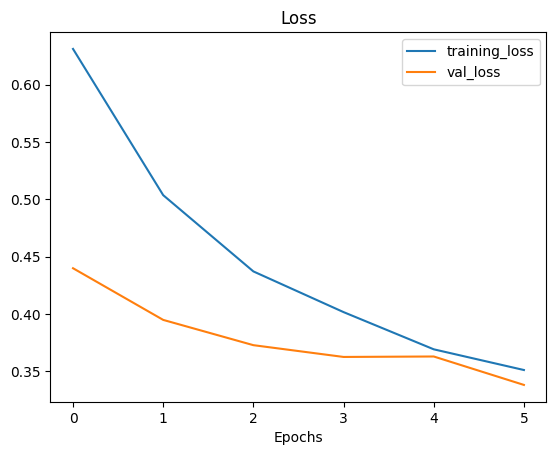

In [77]:
plot_loss_curves(history_fine_10_percent_data_aug)

Ok, so our plots are a bit staggery, but let's notcie that we're plotting just 5 epochs not 10 with 5 additional epochs of fine tunning. Let's create a function for plotting all 10 epochs, 5 of just feature extraction model and 5 of additionaly fine tuned model.

#### Feature Extraction + Fine Tuned model all epochs plot curves

In [78]:
# Let's create a function to compare training histories of 5 feature extraction model and 5 of additionaly fine tuned model

def compare_histories(original_history, new_history, initial_epochs = 5):
  """
  Compares two TensorFlow History objects.
  """

  # Get original history measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combine original history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plot for accuracy
  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label = 'Training Accuracy')
  plt.plot(total_val_acc, label = 'Val Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = 'Start Fine Tuning') # We're subtracting 1 from initial epochs because we have 0 index
  plt.legend(loc = 'lower right')
  plt.title('Training and Validation Accuracy')

  # Make plot for loss
  plt.figure(figsize = (8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label = 'Training Loss')
  plt.plot(total_val_loss, label = 'Val Loss')
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = 'Start Fine Tuning') # We're subtracting 1 from initial epochs because we have 0 index
  plt.legend(loc = 'upper right')
  plt.title('Training and Validation Loss')

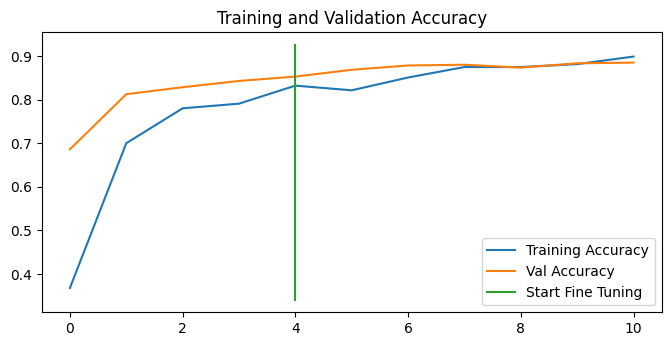

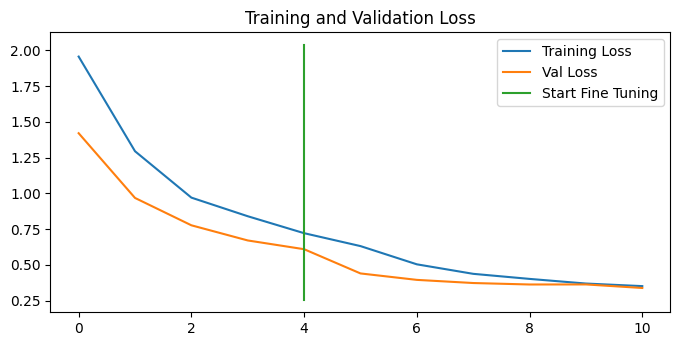

In [79]:
compare_histories(original_history = history_model_2,
                  new_history = history_fine_10_percent_data_aug,
                  initial_epochs = 5)

Awesome, we can see that fine tunning had positive impact on the accuracy and loss. However, we might be slightly overfitting from aroung 6 epoch.

## Model 4: Fine-tuning transfer learning on 100% of training data + data augmentation

Feature Extractions works usually best with smaller amount of data, like 10%. When it comes to fine tunning the more data the better. Let's now train our model on 100% of the training data.

### Set up

In [80]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-29 21:37:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   263MB/s    in 0.6s    

2023-06-29 21:37:09 (263 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [81]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-29 21:37:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  68.1MB/s    in 9.6s    

2023-06-29 21:37:19 (51.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [82]:
!wget https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py

--2023-06-29 21:37:19--  https://raw.githubusercontent.com/AdrianSKazi/Deep-Learning/main/Extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11818 (12K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  11.54K  --.-KB/s    in 0s      

2023-06-29 21:37:19 (127 MB/s) - ‘helper_functions.py.4’ saved [11818/11818]



In [83]:
from helper_functions import unzip_data, create_tensorboard_callback, walk_through_dir, plot_loss_curves, compare_historys

In [84]:
unzip_data('10_food_classes_all_data.zip')

In [85]:
unzip_data('10_food_classes_10_percent.zip')

In [86]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

Now we have 750 train images per class (so 7500 in total), so full pack!

In [87]:
train_dir_full_data = '10_food_classes_all_data/train'
train_dir_10_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_all_data/test'

In [88]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = 'categorical')

train_data_full_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir_full_data,
                                                                 batch_size = BATCH_SIZE,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = 'categorical')

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = BATCH_SIZE,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Data Augmentation Layer

In [89]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
], name = 'data_augmentation')

### Visuzalize data augmentation

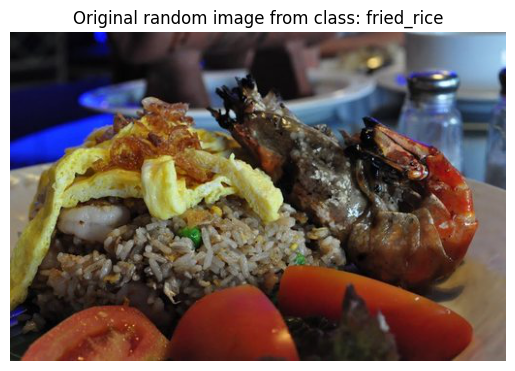

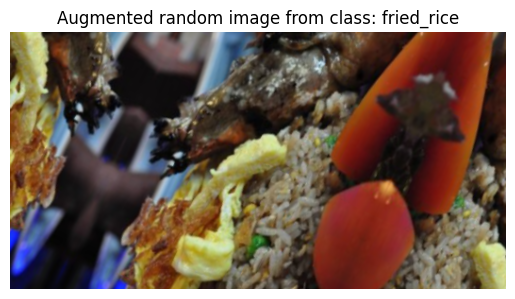

In [90]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = '10_food_classes_all_data/train/' + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + '/' + random_image

# Read in the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.title(f'Original random image from class: {target_class}')
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis = 0))
plt.figure()
plt.title(f'Augmented random image from class: {target_class}')
plt.axis(False)
plt.imshow(tf.squeeze(augmented_img)/255.)

### Feature Extraction Model

Ok So now important thing. Since feature extraction model is best trained on not too big dataset, we're going to use 10_percent of training data for feature extraction model. Then for fine tunning we're going to use 100% of train data.

In [91]:
import tensorflow as tf

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# input
inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_layer')

# data augmentation
x = data_augmentation(inputs)

# base_model
x = base_model(x, training = False)

# global average pooling 2d
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_2D')(x)

# output
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# model
model_4 = tf.keras.Model(inputs, outputs)

# compile
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# ModelCheckpoint callback
# Set checkpoint path
checkpoint_path = 'full_data_model_checkpoint_weights/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, # path where model will be saved
                                                         save_weights_only = True, # only weights of the model will be saved instead whole model
                                                         save_best_only = False, # if true only best epoch will be save, and we won't be able to follow how model was trained through all the epochs
                                                         save_freq = 'epoch', # how often checkpoint should be made, here every epoch
                                                         verbose = 1)

# fit
history_model_4= model_4.fit(train_data_10_percent,
                              epochs = 5,
                              steps_per_epoch = len(train_data_10_percent),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                       experiment_name = '10_percent_data_augmentation_feature_extraction'),
                                           checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmentation_feature_extraction/20230629-213731
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9804 - accuracy: 0.3533
Epoch 1: saving model to full_data_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 22s 599ms/step - loss: 1.9804 - accuracy: 0.3533 - val_loss: 1.4392 - val_accuracy: 0.6748
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3067 - accuracy: 0.6987
Epoch 2: saving model to full_data_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 13s 513ms/step - loss: 1.3067 - accuracy: 0.6987 - val_loss: 0.9877 - val_accuracy: 0.7896
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9879 - accuracy: 0.7680
Epoch 3: saving model to full_data_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 13s 543ms/step - loss: 0.9879 - accuracy: 0.7680 - val_loss: 0.8039 - val

#### Loading checkpoints

In [92]:
model_4.load_weights(checkpoint_path)

#### Check feature extraction model

In [93]:
for layer in model_4.layers:
  print(layer.name, '\n',  layer, '\n',layer.trainable, '\n\n')

input_layer 
 True 


data_augmentation 
 True 


efficientnetb0 
 False 


global_average_pooling_2D 
 True 


output_layer 
 True 




### Fine Tunning Model

In [94]:
from keras.api._v2.keras.callbacks import ModelCheckpoint
# Setting last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# We need to recompile our model after setting new hyperparameters
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), # Usually when we fine tuning we want to lower our learning rate by 10x
                metrics = ['accuracy'])

In [95]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_5 False
rescaling_8 False
normalization_4 False
rescaling_9 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_

### Fine tune for 5 epochs more

Now for fine tunning let's use full data, since fine tunning should have as much data as it's possible.

In [96]:
# fine tune for another 5 epochs
fine_tune_epochs = 5 + 5 # initial_epochs + 5 more

# refit the model (same as model_3 except with more trainable layers)
history_fine_all_data_data_aug = model_4.fit(train_data_full_data,
                                               epochs = fine_tune_epochs,
                                               steps_per_epoch = len(train_data_full_data),
                                               validation_data = test_data,
                                               validation_steps = len(test_data),
                                               initial_epoch = history_model_4.epoch[-1], # start training from last epoch from feature extraction model. Very IMPORTANT!!!
                                               callbacks = [create_tensorboard_callback(dir_name = 'transfer_learning',
                                                                                      experiment_name = 'full_data_fine_rune_last_10_layers')])

Saving TensorBoard log files to: transfer_learning/full_data_fine_rune_last_10_layers/20230629-213851


Epoch 5/10
235/235 [==============================] - 74s 273ms/step - loss: 0.6405 - accuracy: 0.7980 - val_loss: 0.3608 - val_accuracy: 0.8788
Epoch 6/10
235/235 [==============================] - 58s 245ms/step - loss: 0.5249 - accuracy: 0.8303 - val_loss: 0.3381 - val_accuracy: 0.8820
Epoch 7/10
235/235 [==============================] - 54s 229ms/step - loss: 0.4637 - accuracy: 0.8541 - val_loss: 0.3010 - val_accuracy: 0.8992
Epoch 8/10
235/235 [==============================] - 49s 205ms/step - loss: 0.4235 - accuracy: 0.8648 - val_loss: 0.2876 - val_accuracy: 0.9064
Epoch 9/10
235/235 [==============================] - 55s 231ms/step - loss: 0.3944 - accuracy: 0.8720 - val_loss: 0.2825 - val_accuracy: 0.9004
Epoch 10/10
235/235 [==============================] - 46s 194ms/step - loss: 0.3570 - accuracy: 0.8860 - val_loss: 0.2779 - val_accuracy: 0.9104


#### Evaluate

In [97]:
results_10_percent_data_aug

[0.6093643307685852, 0.8528000116348267]

In [98]:
results_fine_tune_10_percent

[0.41241827607154846, 0.864799976348877]

In [99]:
results_fine_tune_all_data = model_4.evaluate(test_data)
results_fine_tune_all_data

79/79 [==============================] - 6s 69ms/step - loss: 0.2779 - accuracy: 0.9104


[0.27792608737945557, 0.9103999733924866]

Awesome, we improved our model up to 90.2% of accuracy!!!

#### Feature Extraction + Fine Tuned model all epochs plot curves

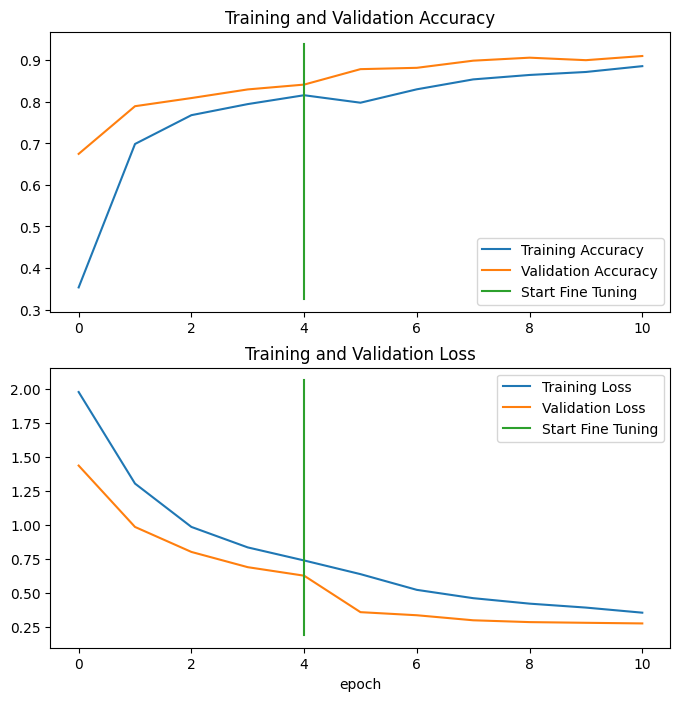

In [100]:
compare_historys(original_history = history_model_4,
                 new_history = history_fine_all_data_data_aug,
                 initial_epochs = 5)

GREAT!!! We have awesome acc and loss, thanks to fine tuning.

## View Experiments on Tensorboard

### Connect

We need to run the code and follow the instructions

In [ ]:
# View tensorboard logs of transfer learning modelling experiments
# Upload Tensorboard dev records

!tensorboard dev upload --logdir ./transfer_learning \ # slash means that we want to start a new line
 --name "Transfer Learning Experiments with 10 Food101 Classes" \
 --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
 --one_shot # exist the uploader once its finished uploading

We will get simmilar view as below

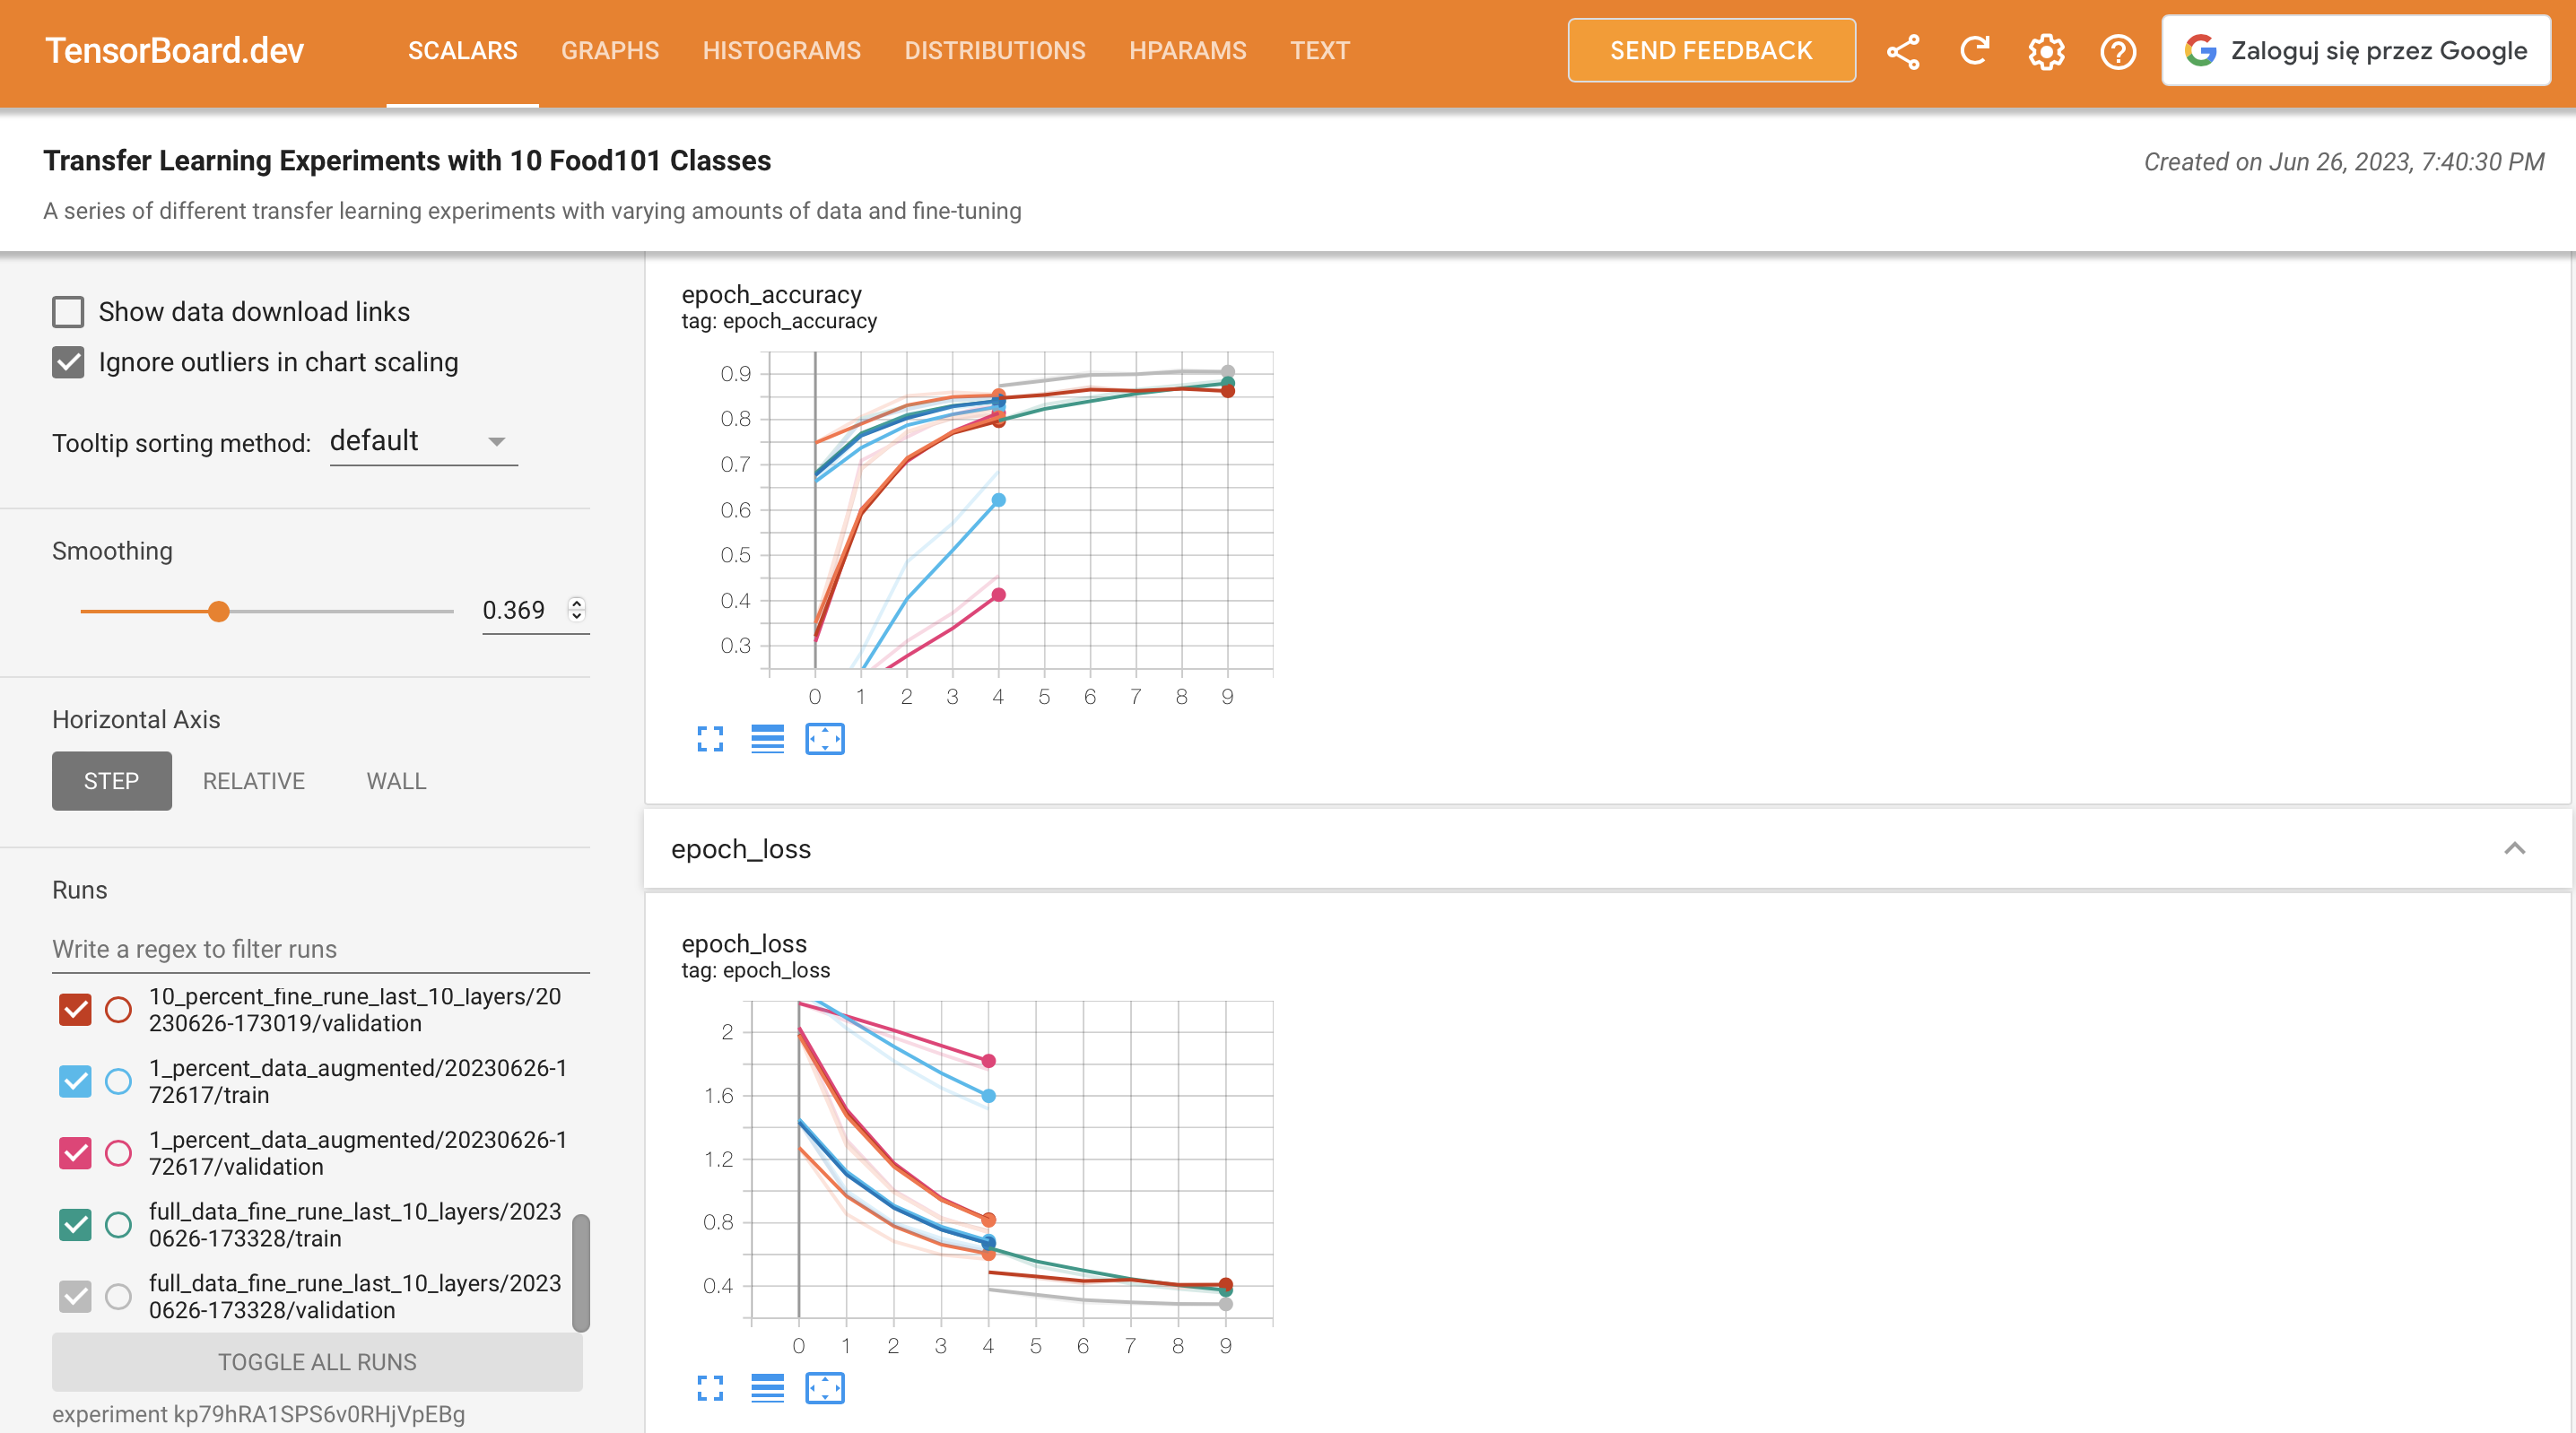

We can see that the best model is the last one where we trained our model on the full dataset with fine tunning on last 10 layers.

### Accuracy

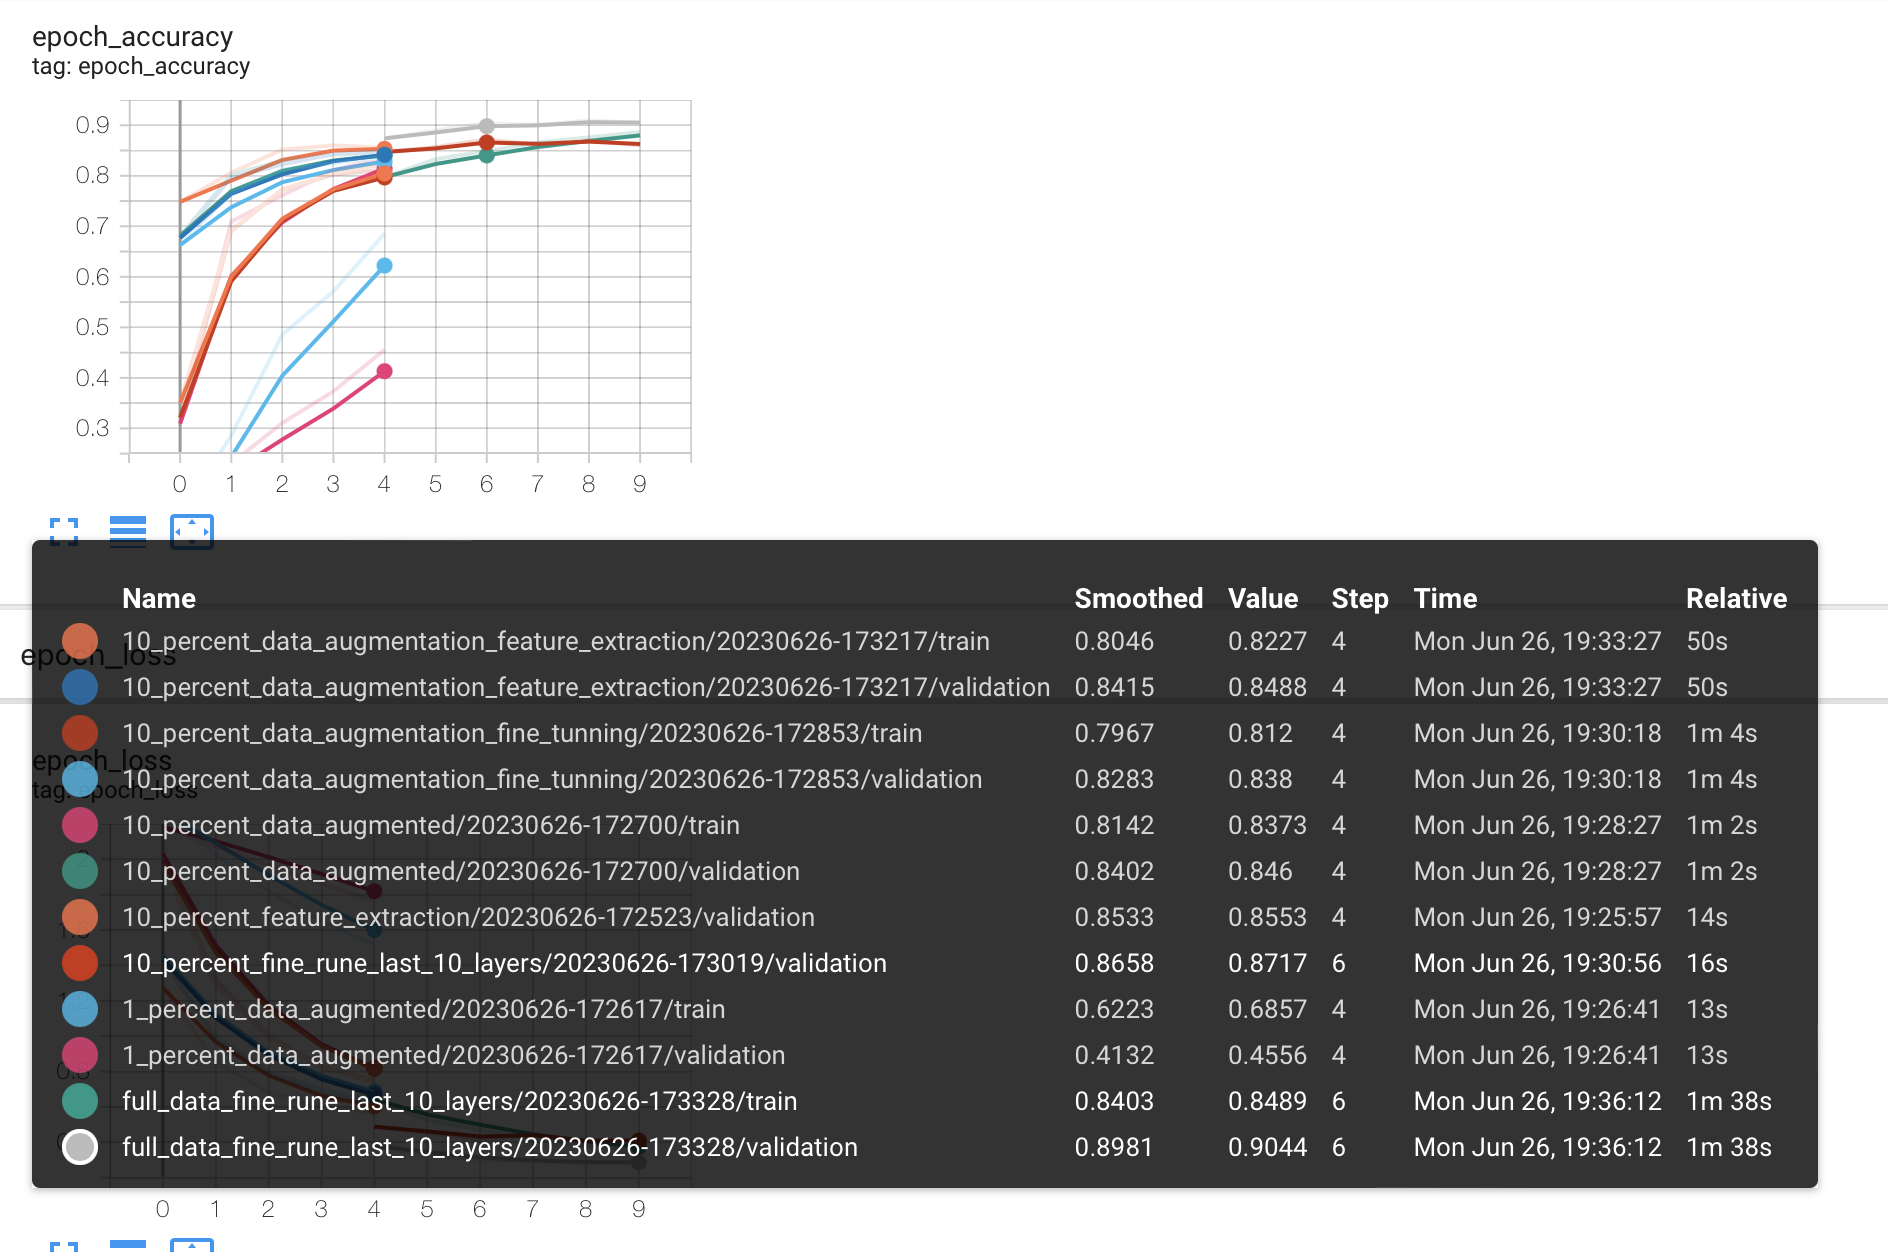

### Loss

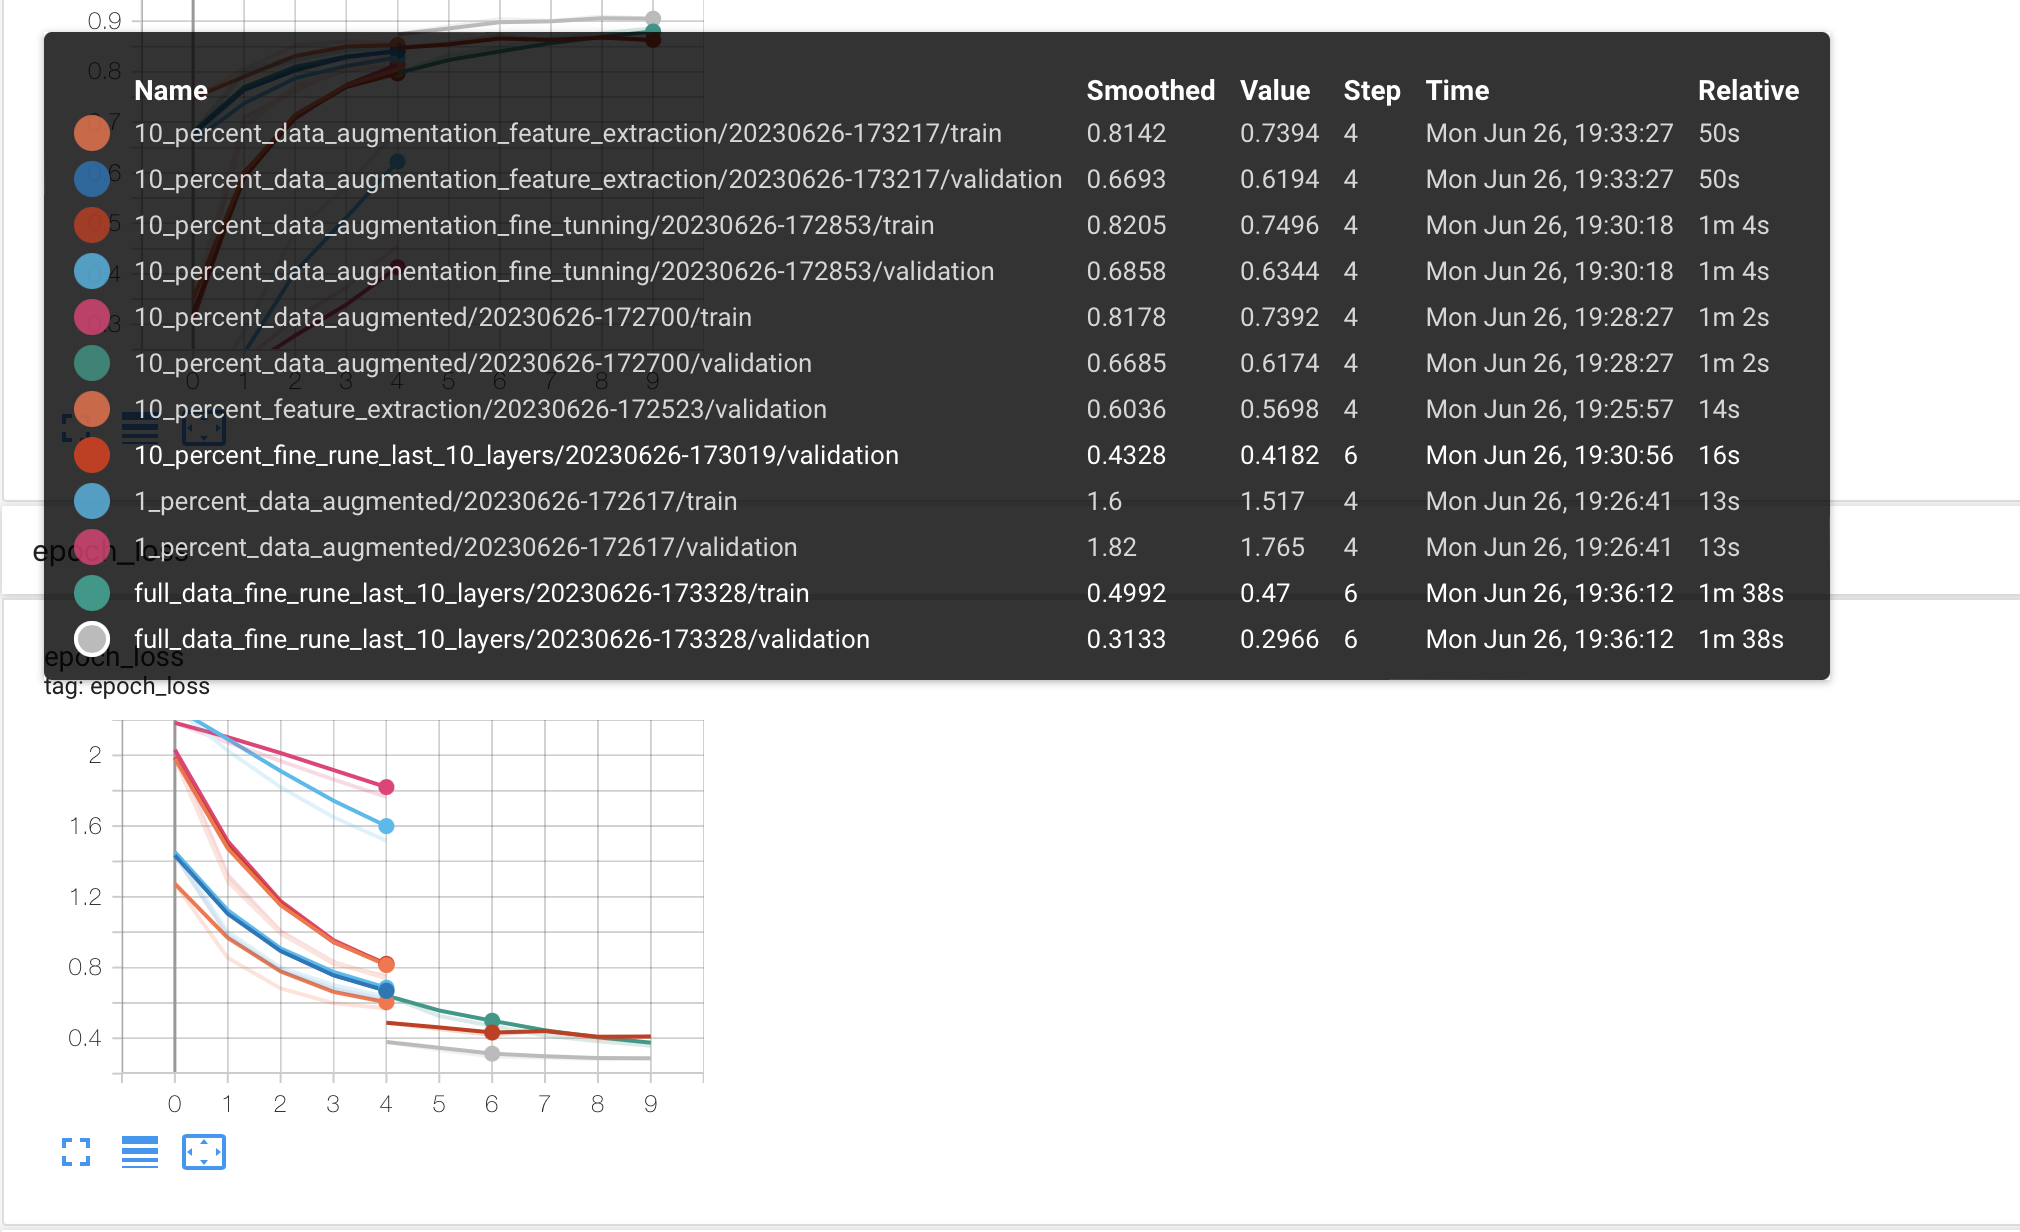

We can see where we fine tuned the data by broken line plot. That means we've trained the model on 5 epochs with feature extraction transfer learning and then added new model with fine tunning transfer learning.

Experiments are available here: [TensorBoard](https://tensorboard.dev/experiment/kp79hRA1SPS6v0RHjVpEBg/#scalars&runSelectionState=eyIxMF9wZXJjZW50X2RhdGFfYXVnbWVudGF0aW9uX2ZlYXR1cmVfZXh0cmFjdGlvbi8yMDIzMDYyNi0xNzMyMTcvdHJhaW4iOmZhbHNlLCIxMF9wZXJjZW50X2RhdGFfYXVnbWVudGF0aW9uX2ZpbmVfdHVubmluZy8yMDIzMDYyNi0xNzI4NTMvdHJhaW4iOmZhbHNlLCIxMF9wZXJjZW50X2RhdGFfYXVnbWVudGVkLzIwMjMwNjI2LTE3MjcwMC90cmFpbiI6ZmFsc2UsIjEwX3BlcmNlbnRfZmVhdHVyZV9leHRyYWN0aW9uLzIwMjMwNjI2LTE3MjUyMy90cmFpbiI6ZmFsc2UsIjEwX3BlcmNlbnRfZmluZV9ydW5lX2xhc3RfMTBfbGF5ZXJzLzIwMjMwNjI2LTE3MzAxOS90cmFpbiI6ZmFsc2UsIjFfcGVyY2VudF9kYXRhX2F1Z21lbnRlZC8yMDIzMDYyNi0xNzI2MTcvdHJhaW4iOmZhbHNlLCJmdWxsX2RhdGFfZmluZV9ydW5lX2xhc3RfMTBfbGF5ZXJzLzIwMjMwNjI2LTE3MzMyOC90cmFpbiI6ZmFsc2V9&_smoothingWeight=0)

### Change state of data on Tensorboard

#### Display all experiments

In [ ]:
!tensorboard dev list

#### Delete an Experiment from Tensorboard

Since all data uploaded to the tensorboard are public it's useful to know how to delete the data from tensorboard

In [ ]:
# !tensorboard dev delete kp79hRA1SPS6v0RHjVpEBg # last code is the ID of an experiment which you can find above. However I don't wont to delete experiments and will leave it available for the public

# Practice

Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

### Setup

In [102]:
import tensorflow as tf

In [103]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-29 21:46:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.5’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-29 21:46:12 (99.5 MB/s) - ‘helper_functions.py.5’ saved [10246/10246]



In [104]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-29 21:46:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.167.128, 142.251.16.128, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.4’

10_food_classes_10_ 100%[===================>] 160.74M   213MB/s    in 0.8s    

2023-06-29 21:46:13 (213 MB/s) - ‘10_food_classes_10_percent.zip.4’ saved [168546183/168546183]



In [105]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, walk_through_dir, compare_historys

In [106]:
unzip_data('10_food_classes_10_percent.zip')

walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

### Feature Extraction Model

In [107]:
train_dir_10_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [108]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            batch_size = BATCH_SIZE,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical')


test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                batch_size = BATCH_SIZE,
                                                                image_size = IMG_SIZE,
                                                                label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [109]:
import tensorflow as tf

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# input
inputs = tf.keras.layers.Input(shape = input_shape, name = 'input_layer')

# base_model
x = base_model(inputs, training = False)

# global average pooling 2d
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_2D')(x)

# output
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

# feature extraction model
model_fe = tf.keras.Model(inputs, outputs)

# compile
model_fe.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# ModelCheckpoint callback
# Set checkpoint path
checkpoint_path = 'exercise/checkpoint.ckpt'

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, # path where model will be saved
                                                         save_weights_only = True, # only weights of the model will be saved instead whole model
                                                         save_best_only = False, # if true only best epoch will be save, and we won't be able to follow how model was trained through all the epochs
                                                         save_freq = 'epoch', # how often checkpoint should be made, here every epoch
                                                         verbose = 1)

# fit
history_model_fe= model_fe.fit(train_data_10_percent,
                              epochs = 10,
                              steps_per_epoch = len(train_data_10_percent),
                              validation_data = test_data,
                              validation_steps = len(test_data),
                              callbacks = [checkpoint_callback])

Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.8051 - accuracy: 0.4467
Epoch 1: saving model to exercise/checkpoint.ckpt
24/24 [==============================] - 18s 474ms/step - loss: 1.8051 - accuracy: 0.4467 - val_loss: 1.2395 - val_accuracy: 0.7596
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.0434 - accuracy: 0.7772
Epoch 2: saving model to exercise/checkpoint.ckpt
24/24 [==============================] - 9s 362ms/step - loss: 1.0438 - accuracy: 0.7747 - val_loss: 0.8344 - val_accuracy: 0.8348
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.7445 - accuracy: 0.8397
Epoch 3: saving model to exercise/checkpoint.ckpt
24/24 [==============================] - 8s 318ms/step - loss: 0.7478 - accuracy: 0.8387 - val_loss: 0.6763 - val_accuracy: 0.8512
Epoch 4/10
23/24 [===========================>..] - ETA: 0s - loss: 0.6017 - accuracy: 0.8696
Epoch 4: saving model to exercise/checkpoint.ckpt
24/24 [=======================

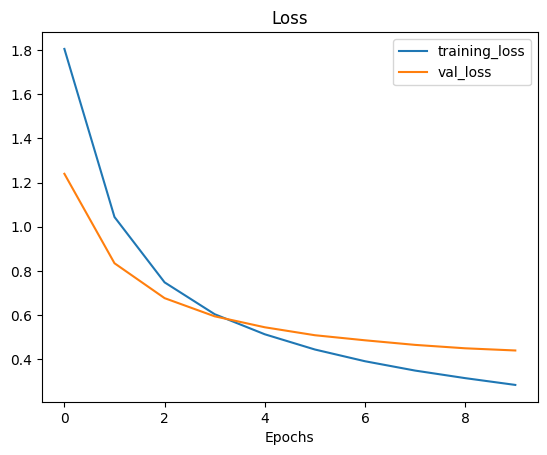

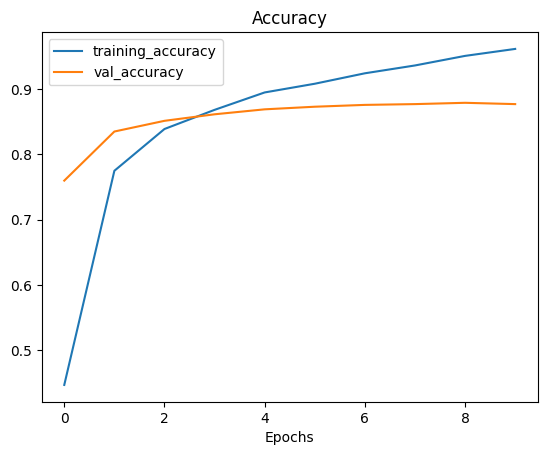

In [110]:
plot_loss_curves(history_model_fe)

In [111]:
model_fe.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.4393 - accuracy: 0.8768


[0.43928036093711853, 0.876800000667572]

Layers

In [112]:
for layer in model_fe.layers:
  print(layer.name, '\n',  layer, '\n',layer.trainable, '\n\n')

input_layer 
 True 


efficientnetb0 
 False 


global_average_pooling_2D 
 True 


output_layer 
 True 




### Fine Tune Model - 20 layers trainable

#### Upload weights

In [113]:
from tensorflow.keras.models import clone_model

model_fe_ft20 = clone_model(model_fe) # Let's copy our feature extraction model to prevent overwriting
model_fe_ft20.load_weights(checkpoint_path)

#### Get into base_model and make trainable layers

In [114]:
model_fe_ft20.layers[1].layers

In [115]:
from keras.api._v2.keras.callbacks import ModelCheckpoint

model_fe_ft20.layers[1].trainable = False

for layer in model_fe_ft20.layers[1].layers[-20:]:
  layer.trainable = True

for layer in model_fe_ft20.layers[1].layers:
  print(layer.name, layer.trainable)

input_6 False
rescaling_10 False
normalization_5 False
rescaling_11 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2

#### Model

In [116]:
# Let's import 100% of data for fine tunning

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-29 21:48:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   217MB/s    in 2.3s    

2023-06-29 21:48:14 (217 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [117]:
unzip_data('10_food_classes_all_data.zip')

train_dir_100_percent = '10_food_classes_all_data/train'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_100_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_100_percent,
                                                                            batch_size = BATCH_SIZE,
                                                                            image_size = IMG_SIZE,
                                                                            label_mode = 'categorical')

Found 7500 files belonging to 10 classes.


In [118]:
model_fe_ft20.compile(loss = 'categorical_crossentropy',
                       optimizer = tf.keras.optimizers.Adam(),
                       metrics = ['accuracy'])

fine_tune_epochs = 10 + 10 # 10 previous epochs and another 10 for fine tuning

history_model_fe_ft20 = model_fe_ft20.fit(train_data_100_percent,
                                               epochs = fine_tune_epochs,
                                               steps_per_epoch = len(train_data_100_percent),
                                               validation_data = test_data,
                                               validation_steps = len(test_data),
                                               initial_epoch = history_model_fe.epoch[-1],
)

Epoch 10/20
235/235 [==============================] - 32s 107ms/step - loss: 0.5589 - accuracy: 0.8291 - val_loss: 0.3964 - val_accuracy: 0.8796
Epoch 11/20
235/235 [==============================] - 24s 101ms/step - loss: 0.4464 - accuracy: 0.8644 - val_loss: 0.3640 - val_accuracy: 0.8892
Epoch 12/20
235/235 [==============================] - 25s 102ms/step - loss: 0.3928 - accuracy: 0.8809 - val_loss: 0.3454 - val_accuracy: 0.8928
Epoch 13/20
235/235 [==============================] - 24s 102ms/step - loss: 0.3548 - accuracy: 0.8947 - val_loss: 0.3312 - val_accuracy: 0.8968
Epoch 14/20
235/235 [==============================] - 24s 101ms/step - loss: 0.3239 - accuracy: 0.9040 - val_loss: 0.3227 - val_accuracy: 0.8980
Epoch 15/20
235/235 [==============================] - 24s 101ms/step - loss: 0.2990 - accuracy: 0.9116 - val_loss: 0.3165 - val_accuracy: 0.9008
Epoch 16/20
235/235 [==============================] - 42s 177ms/step - loss: 0.2786 - accuracy: 0.9212 - val_loss: 0.3143 -

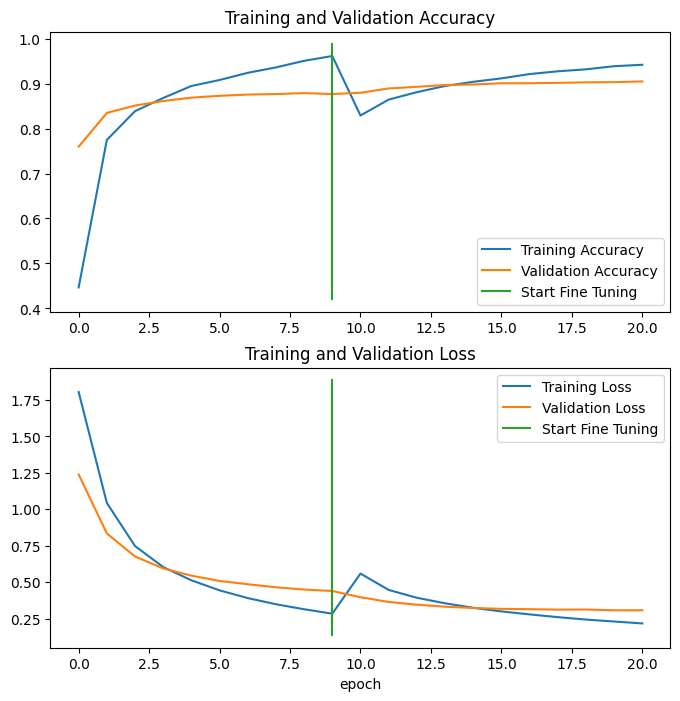

In [119]:
compare_historys(original_history = history_model_fe,
                 new_history = history_model_fe_ft20,
                 initial_epochs = 10)

In [120]:
model_fe_ft20.evaluate(test_data)

79/79 [==============================] - 6s 69ms/step - loss: 0.3068 - accuracy: 0.9048


[0.30678290128707886, 0.9047999978065491]

### Fine Tune Model - 30 layers trainable

#### Upload Weights

In [121]:
model_fe_ft30 = clone_model(model_fe) # Let's copy our feature extraction model to prevent overwriting
model_fe_ft30.load_weights(checkpoint_path)

### GEt into base_model and make trainable layers

In [122]:
model_fe_ft30.layers[1].layers

In [123]:
from keras.api._v2.keras.callbacks import ModelCheckpoint

base_model.trainable = False

for layer in model_fe_ft30.layers[1].layers[-30:]:
  layer.trainable = True

for layer in model_fe_ft30.layers[1].layers:
  print(layer.name, layer.trainable)

input_6 True
rescaling_10 False
normalization_5 False
rescaling_11 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b

In [135]:
model_fe_ft30.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

fine_tune_epochs = 10 + 10# 10 previous epochs and another 10 for fine tuning

history_model_fe_ft30 = model_fe_ft30.fit(train_data_100_percent,
                                               epochs = fine_tune_epochs,
                                               steps_per_epoch = len(train_data_100_percent),
                                               validation_data = test_data,
                                               validation_steps = len(test_data),
                                               initial_epoch = history_model_fe.epoch[-1],
)

Epoch 10/20
235/235 [==============================] - 53s 153ms/step - loss: 0.6255 - accuracy: 0.8053 - val_loss: 0.3046 - val_accuracy: 0.9048
Epoch 11/20
235/235 [==============================] - 27s 112ms/step - loss: 0.2769 - accuracy: 0.9141 - val_loss: 0.3283 - val_accuracy: 0.9012
Epoch 12/20
235/235 [==============================] - 27s 111ms/step - loss: 0.1534 - accuracy: 0.9477 - val_loss: 0.3362 - val_accuracy: 0.8984
Epoch 13/20
235/235 [==============================] - 31s 132ms/step - loss: 0.0887 - accuracy: 0.9719 - val_loss: 0.3503 - val_accuracy: 0.9052
Epoch 14/20
235/235 [==============================] - 27s 114ms/step - loss: 0.0692 - accuracy: 0.9768 - val_loss: 0.3775 - val_accuracy: 0.9020
Epoch 15/20
235/235 [==============================] - 25s 106ms/step - loss: 0.0774 - accuracy: 0.9779 - val_loss: 0.4644 - val_accuracy: 0.8964
Epoch 16/20
235/235 [==============================] - 25s 103ms/step - loss: 0.0808 - accuracy: 0.9751 - val_loss: 0.4078 -

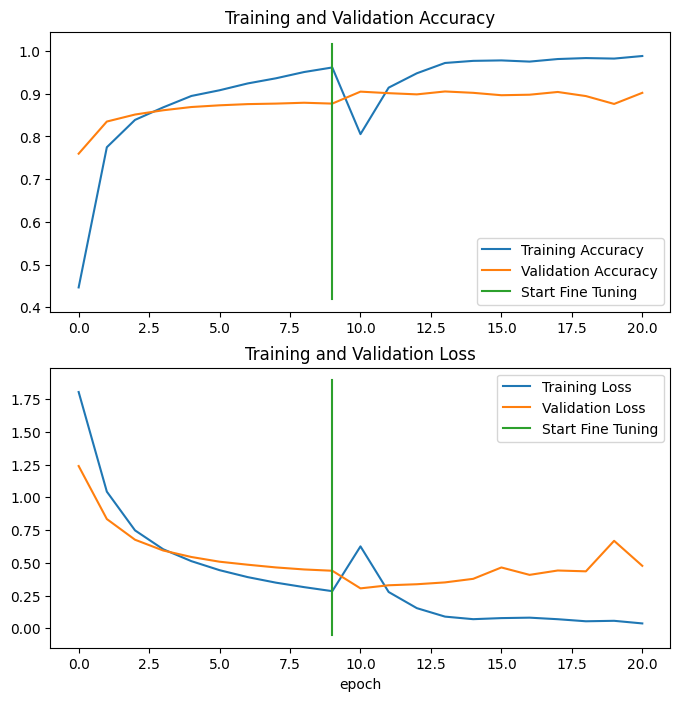

In [136]:
compare_historys(original_history = history_model_fe,
                 new_history = history_model_fe_ft30,
                 initial_epochs = 10)

In [137]:
model_fe_ft30.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.4768 - accuracy: 0.9020


[0.4768468737602234, 0.9020000100135803]

Fine tunning with 20 layers trainable performed better in terms of evaluation as well in terms of plots. It seems not to overfit in contrary to the model with 30 trainable layers.